# Clustering with $K$-Means and EM

Guilherme Franca (<guifranca@gmail.com>), 07/28/2016

Abstract: We briefly review K-Means and the Expectation Maximization (EM) algorithms. For EM we consider Gaussian Mixture Models (GMM) only. We implement both algorithms and show some simple simulations.


## $K$-Means

Let us briefly review the $K$-Means algorithm.
Let $C_k$, $k=1,\dotsc,K$, denote a cluster of points with center $\mu_k \in \mathbb{R}^D$. Consider a data set $\{ x_n \}_{n=1}^N$, where $x_n \in \mathbb{R}^D$. For each $x_n$ introduce a binary vector $r_n$ with components 
$$
r_{nk} = \begin{cases} 1 & \mbox{if $x_n \in C_k$} \\ 
0 & \mbox{otherwise} \end{cases}, 
$$ 
thus the variable $r_n$ specifies to which cluster the point $x_n$ belongs to. Notice that $\sum_{j=1}^K r_{nk}=1$. Define the *distortion measure*
$$
J = \dfrac{1}{2} \sum_{n=1}^N\sum_{k=1}^K r_{nk} \| x_n - \mu_k \|^2 
$$
which is the sum of intra-cluster square distances. The problem we need to solve is
$$
\min_{\{r_{nk}\},\{\mu_k\}} J
$$

We solve this problem through an iterative procedure consisting of two steps. First, we choose some initial values for each $\mu_k$. Then we minimize $J$ with respect to $r_{nk}$ while keeping $\mu_k$ fixed (this is the analogous of the E-step in EM). Then we minimize $J$ whith respect to $\mu_k$ while keeping $r_{nk}$ fixed (this is the analogous of the M-step). We repeat this until convergence is attained. More specifically, the E-step consists of the update
$$
r_{nk} = \begin{cases} 
1 & \mbox{if $k=\mbox{argmin}_j \| x_n - \mu_j \|^2$} \\
0 & \mbox{otherwise}
\end{cases}.
$$
For the  $M$-step, differentiate $J$ with respect to $\mu_k$ and equate to zero, yielding
$$
\mu_k = \dfrac{1}{N_k} \sum_{n=1}^N r_{nk} x_n
$$
where we defined $N_k = \sum_{n=1}^N r_{nk}$, the number of points belonging to cluster $C_k$. 

In simple words, $K$-Means just associate the point $x_n$ to the cluster with closest center, then update the centers of each cluster by taking the average of the points associated to it. $K$-Means is said to be hard-clustering since each point belongs to one and only cluster (in EM each point has a probability of belonging to each cluster, which is a soft-clustering).

This algorithm converges to a local minimum, however, it is highly sensitive to the initial conditions. A good initialization procedure is described in the following.


### $K$-Means++

This initialization makes the algorithm more stable. Denote $D(x_i, \mu_j) = \| x_i = \mu_j \|^2$. 

1. Choose $\mu_1$ at random from $\{x_n\}$.
2. For each $x_n$, assign the value $d_n = \min\{D(x_n,\mu_1), \dotsc, D(x_n,\mu_k)\}$, where $k \le K$ is the number of centers already chosen at this stage.
3. Form a probability vector $p \in \mathbb{R}^n$ out of $\{d_n\}$ such that $p_n = \tfrac{d_n}{\sum_{j=1}^{k} d_j}$. Choose $\mu_k$ at random from $\{ x_n \}$ with probability distribution given by $p$.
4. Repeat until $k=K$.


### Implementation and Simulation

The above algorithm is implemented in the file **kmeans.py**.
Below we make use of this code.

In [32]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import kmeans

First we generate artificial data. We generate $3$ clusters from a $2$-dimensional gaussian distribution, and we plot this original data set.

In [33]:
mean = np.array([0, 0])
cov = np.array([[4, 0], [0, 1]])
data1 = np.random.multivariate_normal(mean, cov, 200)

mean = np.array([3, 5])
cov = np.array([[1, 0.8], [0.8, 2]])
data2 = np.random.multivariate_normal(mean, cov, 200)

mean = np.array([-2, 3])
cov = np.array([[0.5, 0], [0, 0.5]])
data3 = np.random.multivariate_normal(mean, cov, 200)

data = np.concatenate((data1, data2, data3))

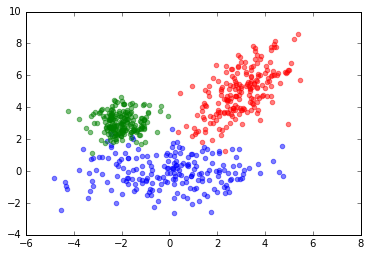

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data1[:, 0], data1[:, 1], color='blue', alpha=0.5)
ax.scatter(data2[:, 0], data2[:, 1], color='red', alpha=0.5)
ax.scatter(data3[:, 0], data3[:, 1], color='green', alpha=0.5)

Now let us use $K$-Means to cluster this data set.

In [35]:
K=3
labels, centers = kmeans.kmeans(K, data)

In [36]:
print centers

[[-2.08052657  2.68669483]
 [ 0.58547885 -0.06224048]
 [ 3.09958372  5.14025475]]


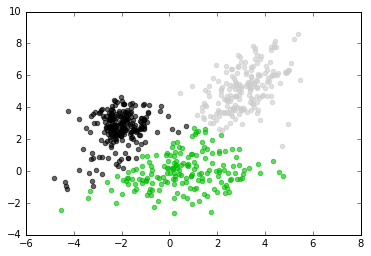

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = getattr(cm, 'spectral')(np.linspace(0, 1, K))
for k in range(K):
    xs = data[:,0][np.where(labels==k)]
    ys = data[:,1][np.where(labels==k)]
    ax.scatter(xs, ys, color=colors[k], alpha=.6)

In [38]:
K=4
labels, centers = kmeans.kmeans(K, data)

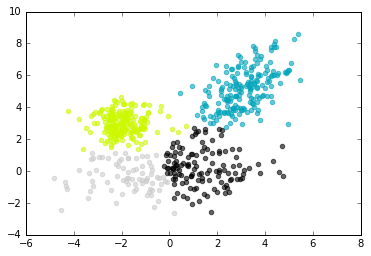

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = getattr(cm, 'spectral')(np.linspace(0, 1, K))
for k in range(K):
    xs = data[:,0][np.where(labels==k)]
    ys = data[:,1][np.where(labels==k)]
    ax.scatter(xs, ys, color=colors[k], alpha=.6)

## Maximum Likelihood

Given a data set $\{x_n\}$ and a probability density function $f(x\vert\theta)$, where $\theta$ represent the parameters, the data likelihood function is given by
$$
L(\theta) = \prod_{n=1}^{N} f(x_n \vert \theta).
$$
The goal of maximum likelihood estimation (MLE) is to solve 
$$
\widehat{\theta} = \mbox{argmax}_\theta L(\theta)
$$ 
given the data. It is more convenient to work with the log likelihood function
$$
\ell(\theta) = \sum_{n=1}^N \log f(x_n \vert \theta)
$$
and one tries to solve $\partial_\theta \ell(\theta) = 0$ to obtain a closed form solution, or if this is not possible one must solve the above optimization problem numerically.

Consider $x_n \in \mathbb{R}^D$ with a Gaussian distribution 
$$
\mathcal{N}(x \vert \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2}} \dfrac{1}{|\Sigma|^{1/2}}
\exp\left\{ -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right\}.
$$
We thus have
$$
\ell(\mu, \Sigma) = - \dfrac{N D}{2}\log 2\pi - \dfrac{N}{2} \log |\Sigma|
-\dfrac{1}{2} \sum_{n=1}^N (x_n-\mu)^T \Sigma^{-1} (x_n-\mu).
$$
Solving $\partial_{\mu} \ell = 0$ and $\partial_{\Sigma} \ell = 0$ we obtain the MLE estimators
$$
\widehat{\mu} = \dfrac{1}{N} \sum_{n=1}^N x_n, \qquad
\widehat{\Sigma} = \dfrac{1}{N} \sum_{n=1}^N (x-\mu)(x-\mu)^T.
$$
One can check that $\mathbb{E}[\widehat{\mu}] = \mu$ (unbiased) and $\mathbb{E}[\widehat{\Sigma}] = \tfrac{N-1}{N} \sigma$ (biased). Thus MLE underestimate the variance, but it is consistent. This is only a problem for small $N$. We redefine an unbiased estimator for the covariance matrix through
$$
\widehat{\Sigma} = \dfrac{1}{N-1} \sum_{n=1}^N (x-\mu)(x-\mu)^T.
$$

**Implementation:** A simple MLE estimation for a single Gaussian is found in file **gaussian_mle.py**. Let us use this code in the following.

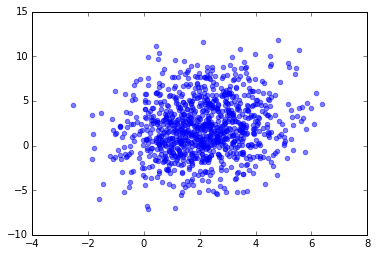

In [51]:
import gaussian_mle as gmle

# generate data from a 2D Gaussian
mu = np.array([2, 2])
sigma = np.array([[2, 0.5], [0.5, 10]])
data = np.random.multivariate_normal(mu, sigma, 1000)

plt.scatter(data[:,0], data[:,1], color='blue', alpha=0.5)

In [53]:
muhat, sigmahat = gmle.gaussian_mle_estimator(data)
print muhat
print sigmahat

[ 2.09168457  2.00165756]
[[  2.12958757   0.75132052]
 [  0.75132052  10.46019855]]


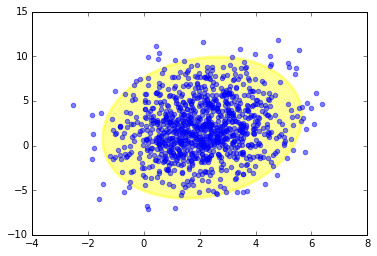

In [54]:
# plot the confidence interval for the estimated Gaussian containing 95% of points
gmle.scatter_ellipse(data, muhat, sigmahat)

## EM Algorithm

Now we discusss the EM algorithm, but first let us discuss mixture of Gaussians and the Maximum Likelihood Estimation (MLE).

A mixture of $K$ Gaussian components has the form
$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x \vert \mu_k, \Sigma_k)
$$
Integrating this over $x$ implies that $\sum_k \pi_k = 1$. Moreover, since $p(x) \ge 0$ and
$\mathcal{N}(\cdot \vert \cdot) \ge 0$ it implies $\pi_k \ge 0$ and thus $0\le \pi_k \le 1$. Thus $\pi_k$ is the (prior) probability that any given point belongs to component $k$.

Let $z\in\mathbb{R}^K$ be a binary vector such that $z_k\in{0,1}$ and $\sum_k z_k = 1$. There are $K$ different ways of building such a $z$, which is called a latent variable. Notice that $p(z_k = 1) = \pi_k$. We have $p(x,z) = p(x|z)p(z)$ where
$p(z) = \prod_k \pi_k^{z_k}$ and $p(x|z) = \prod_k \mathcal{N}(x\vert \mu_k,\sigma_k)^{z_k}$